In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import pickle as pkl

from ex_cosmology import p

# adaptive-wavelets modules
import awave
from awave.data.cosmology import get_dataloader, load_pretrained_model
from awave.data.cosmology import get_validation

# ICA/dictionarylearning
from sklearn.decomposition import FastICA
from sklearn.decomposition import DictionaryLearning, MiniBatchDictionaryLearning
from skimage.transform import rescale

In [2]:
# get dataloader and model
train_loader, val_loader = get_dataloader(p.data_path,
                                          img_size=64,
                                          split_train_test=True,
                                          batch_size=p.batch_size)

# validation dataset
test_loader = get_validation(p.data_path,
                             img_size=64,
                             batch_size=p.batch_size)

In [4]:
# data matrix
X = train_loader.dataset.dataset.imgs.reshape(-1, 64*64)
X = X[:20000, :]

In [5]:
# transformer = MiniBatchDictionaryLearning(n_components=500, alpha=5, batch_size=100, random_state=0)
# transformer = DictionaryLearning(n_components=64, alpha=5, random_state=0)
transformer = FastICA(n_components=500, max_iter=50000, random_state=0)
S = transformer.fit_transform(X)
# A = transformer.components_
A = transformer.mixing_

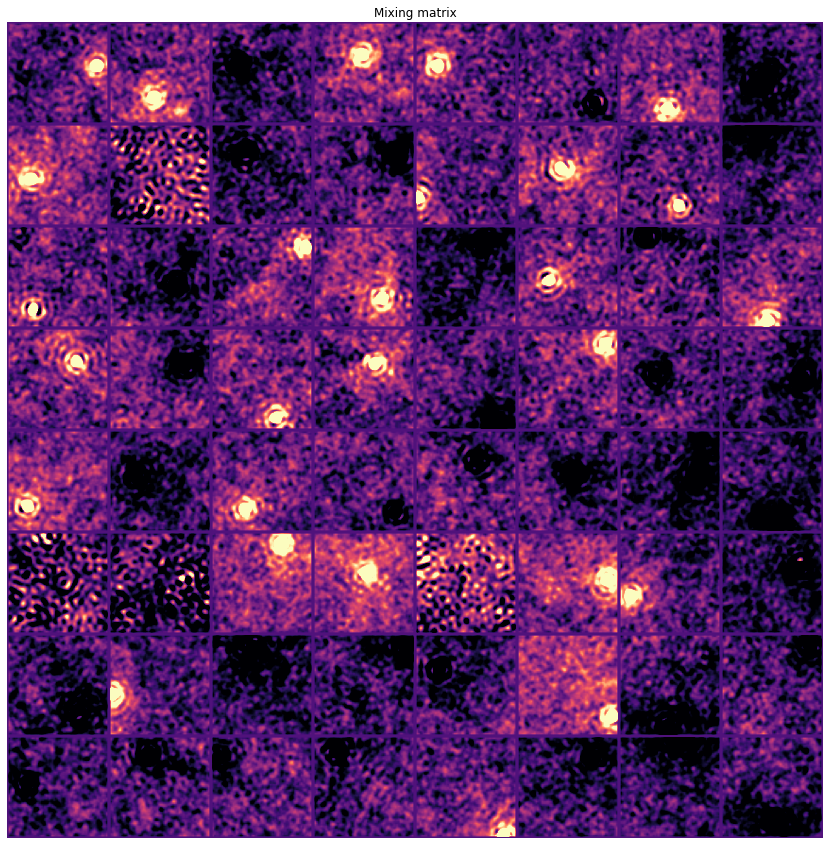

In [7]:
# dic = pkl.load(open('results/ICA_n_components={}.pkl'.format(500), 'rb'))
# S = dic['S']
# A = dic['A']

plt.figure(figsize=(15,15))
p = 64 + 2
n_row = 8
n_col = 8
mosaic = np.zeros((p*n_row,p*n_col))
indx = 0
normalize = False
for i in range(n_row):
    for j in range(n_col):
        im = A[:,indx].reshape((64,64))
        if normalize:
            im = (im-np.min(im))
            im = im/np.max(im)
        mosaic[i*p:(i+1)*p,j*p:(j+1)*p] = np.pad(im,(1,1),mode='constant')
        indx += 1
plt.title("Mixing matrix")
plt.imshow(rescale(mosaic,4,mode='constant'), cmap='magma', vmax=0.15, vmin=-0.05)
plt.axis('off')    
plt.show() 

In [12]:
X_hat = S @ A.T
print(np.mean(np.sum((X_hat - X) ** 2, axis=1) / np.sum(X ** 2, axis=1)))

0.15242993051360096
